# 4. 셀프 주유소는 정말 저렴할까

## 1. Selenium 사용하기

In [8]:
from selenium import webdriver

In [21]:
# 크롬 드라이버
driver = webdriver.Chrome('./driver/chromedriver')
driver.get("https://nid.naver.com/nidlogin.login?mode=form&url=https%3A%2F%2Fwww.naver.com")
# 개발자를 확인할 수 없습니다. 경고 -> xattr -d com.apple.quarantine chromedriver 해결

In [17]:
driver.save_screenshot('./img/001.png')

True

In [23]:
elem_login = driver.find_element_by_id('id')
elem_login.clear()
elem_login.send_keys('*****')

elem_login = driver.find_element_by_id('pw')
elem_login.clear()
elem_login.send_keys('***************')

In [24]:
# 로그인 버튼 누르기
xpath = """//*[@id="log.login"]"""
driver.find_element_by_xpath(xpath).click()

In [25]:
driver.get("https://mail.naver.com/")

In [26]:
from bs4 import BeautifulSoup

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [27]:
# 메일 보낸 사람 리스트 뽑기
raw_list = soup.find_all('div', 'name _ccr(lst.from)')
raw_list

[<div class="name _ccr(lst.from)"><span class="blind">보낸 이:</span><a class="_c1(myContextMenu|showSenderContextLayer|list|32531) _stopDefault" href="#" title='"네이버" &lt;account_noreply@navercorp.com&gt;'>네이버</a></div>,
 <div class="name _ccr(lst.from)"><span class="blind">보낸 이:</span><a class="_c1(myContextMenu|showSenderContextLayer|list|32530) _stopDefault" href="#" title='"네이버" &lt;account_noreply@navercorp.com&gt;'>네이버</a></div>,
 <div class="name _ccr(lst.from)"><span class="blind">보낸 이:</span><a class="_c1(myContextMenu|showSenderContextLayer|list|32529) _stopDefault" href="#" title='"티몬 단하루" &lt;noreply@tmon.kr&gt;'>티몬 단하루</a></div>,
 <div class="name _ccr(lst.from)"><span class="blind">보낸 이:</span><a class="_c1(myContextMenu|showSenderContextLayer|list|32528) _stopDefault" href="#" title='"인터파크투어" &lt;news@tour.interpark.com&gt;'>인터파크투어</a></div>,
 <div class="name _ccr(lst.from)"><span class="blind">보낸 이:</span><a class="_c1(myContextMenu|showSenderContextLayer|list|32527) _st

In [28]:
send_list = [raw_list[n].find('a').get_text() for n in range(0, len(raw_list))]
send_list

['네이버',
 '네이버',
 '티몬 단하루',
 '인터파크투어',
 '스펙업｜취업,대학생,인턴,대기업,공기업,GSAT,대외활동,공모전',
 'Namepr',
 '네이버',
 'Namepr',
 '티몬 밸런스딜',
 'GitHub',
 '서울카페쇼 사무국',
 '티몬 단하루',
 '멜론',
 '스펙업｜취업,대학생,인턴,대기업,공기업,GSAT,대외활동,공모전',
 'Namepr']

In [29]:
# 크롬 드라이버 종료
driver.close()

## 서울시 구별 주유소 가격 정보 얻기

In [33]:
driver = webdriver.Chrome('./driver/chromedriver')
driver.get("https://www.opinet.co.kr/searRgSelect.do")

In [35]:
gu_list_raw = driver.find_element_by_xpath("""//*[@id="SIGUNGU_NM0"]""")
gu_list = gu_list_raw.find_elements_by_tag_name('option')

In [36]:
gu_names = [option.get_attribute('value') for option in gu_list]
gu_names.remove("")
gu_names

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [37]:
element = driver.find_element_by_id('SIGUNGU_NM0')
element.send_keys(gu_names[0])

In [39]:
# 조회버튼 누르기
xpath = """//*[@id="searRgSelect"]"""
element_sel_gu = driver.find_element_by_xpath(xpath).click()

In [41]:
xpath = """//*[@id="glopopd_excel"]"""
element_gu_excel = driver.find_element_by_xpath(xpath).click()

In [42]:
import time
from tqdm import tqdm_notebook

for gu in tqdm_notebook(gu_names):
    element = driver.find_element_by_id("SIGUNGU_NM0")
    element.send_keys(gu)

    time.sleep(2)

    xpath = """//*[@id="searRgSelect"]"""
    element_sel_gu = driver.find_element_by_xpath(xpath).click()

    time.sleep(1)

    xpath = """//*[@id="glopopd_excel"]"""
    element_gu_excel = driver.find_element_by_xpath(xpath).click()

    time.sleep(1)

/var/folders/sf/6z15ln896cdb_vcd6ndtf9g00000gn/T/ipykernel_42550/3252468864.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for gu in tqdm_notebook(gu_names):


  0%|          | 0/25 [00:00<?, ?it/s]

In [43]:
driver.close()

In [44]:
import pandas as pd
from glob import glob
# glob : 파일 경로 등을 쉽게 접근할 수 있게 해주는 모듈

In [45]:
glob('./data/지역*.xls')
# '지역'으로 시작하는 엑셀파일 전체

['./data/지역_위치별(주유소) (9).xls',
 './data/지역_위치별(주유소) (12).xls',
 './data/지역_위치별(주유소) (5).xls',
 './data/지역_위치별(주유소) (4).xls',
 './data/지역_위치별(주유소) (13).xls',
 './data/지역_위치별(주유소) (8).xls',
 './data/지역_위치별(주유소) (3).xls',
 './data/지역_위치별(주유소) (18).xls',
 './data/지역_위치별(주유소) (22).xls',
 './data/지역_위치별(주유소) (14).xls',
 './data/지역_위치별(주유소) (15).xls',
 './data/지역_위치별(주유소) (23).xls',
 './data/지역_위치별(주유소) (19).xls',
 './data/지역_위치별(주유소) (2).xls',
 './data/지역_위치별(주유소) (20).xls',
 './data/지역_위치별(주유소) (1).xls',
 './data/지역_위치별(주유소) (16).xls',
 './data/지역_위치별(주유소) (17).xls',
 './data/지역_위치별(주유소) (21).xls',
 './data/지역_위치별(주유소) (10).xls',
 './data/지역_위치별(주유소).xls',
 './data/지역_위치별(주유소) (7).xls',
 './data/지역_위치별(주유소) (6).xls',
 './data/지역_위치별(주유소) (11).xls']

In [51]:
station_files = glob('./data/지역*.xls')
station_files

['./data/지역_위치별(주유소) (9).xls',
 './data/지역_위치별(주유소) (12).xls',
 './data/지역_위치별(주유소) (5).xls',
 './data/지역_위치별(주유소) (4).xls',
 './data/지역_위치별(주유소) (13).xls',
 './data/지역_위치별(주유소) (8).xls',
 './data/지역_위치별(주유소) (3).xls',
 './data/지역_위치별(주유소) (18).xls',
 './data/지역_위치별(주유소) (22).xls',
 './data/지역_위치별(주유소) (14).xls',
 './data/지역_위치별(주유소) (15).xls',
 './data/지역_위치별(주유소) (23).xls',
 './data/지역_위치별(주유소) (19).xls',
 './data/지역_위치별(주유소) (2).xls',
 './data/지역_위치별(주유소) (20).xls',
 './data/지역_위치별(주유소) (1).xls',
 './data/지역_위치별(주유소) (16).xls',
 './data/지역_위치별(주유소) (17).xls',
 './data/지역_위치별(주유소) (21).xls',
 './data/지역_위치별(주유소) (10).xls',
 './data/지역_위치별(주유소).xls',
 './data/지역_위치별(주유소) (7).xls',
 './data/지역_위치별(주유소) (6).xls',
 './data/지역_위치별(주유소) (11).xls']

In [52]:
tmp_raw = []

for file_name in station_files:
    tmp = pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp)

station_raw = pd.concat(tmp_raw)

In [53]:
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 454 entries, 0 to 9
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      454 non-null    object
 1   상호      454 non-null    object
 2   주소      454 non-null    object
 3   상표      454 non-null    object
 4   전화번호    454 non-null    object
 5   셀프여부    454 non-null    object
 6   고급휘발유   454 non-null    object
 7   휘발유     454 non-null    object
 8   경유      454 non-null    object
 9   실내등유    454 non-null    object
dtypes: object(10)
memory usage: 39.0+ KB


In [54]:
station_raw.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,(주)자연에너지 햇살주유소,서울 도봉구 방학로 142 (방학동),현대오일뱅크,02-954-4555,Y,1860,1699,1499,-
1,서울특별시,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),현대오일뱅크,02-955-5185,N,-,1725,1515,1050
2,서울특별시,대성산업(주)신창주유소,서울 도봉구 덕릉로 267 (창동),GS칼텍스,02-905-4441,N,-,1727,1527,-
3,서울특별시,구도일주유소 도봉,서울 도봉구 도봉로 706 (방학동),S-OIL,02-3491-3454,Y,1967,1728,1528,1100
4,서울특별시,한이에너지(주)KLP제1주유소,서울 도봉구 도봉로 596 (창동),현대오일뱅크,02-902-5189,N,-,1728,1528,-


In [56]:
stations = pd.DataFrame({'Oil_store' : station_raw['상호'],
                                '주소' : station_raw['주소'],
                                '가격': station_raw['휘발유'],
                                '셀프' : station_raw['셀프여부'],
                                '상표' : station_raw['상표']})

stations.head()

,Oil_store,주소,가격,셀프,상표
0,(주)자연에너지 햇살주유소,서울 도봉구 방학로 142 (방학동),1699,Y,현대오일뱅크
1,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),1725,N,현대오일뱅크
2,대성산업(주)신창주유소,서울 도봉구 덕릉로 267 (창동),1727,N,GS칼텍스
3,구도일주유소 도봉,서울 도봉구 도봉로 706 (방학동),1728,Y,S-OIL
4,한이에너지(주)KLP제1주유소,서울 도봉구 도봉로 596 (창동),1728,N,현대오일뱅크


In [57]:
stations['구'] = [eachAddress.split()[1] for eachAddress in stations['주소']]
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,(주)자연에너지 햇살주유소,서울 도봉구 방학로 142 (방학동),1699,Y,현대오일뱅크,도봉구
1,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),1725,N,현대오일뱅크,도봉구
2,대성산업(주)신창주유소,서울 도봉구 덕릉로 267 (창동),1727,N,GS칼텍스,도봉구
3,구도일주유소 도봉,서울 도봉구 도봉로 706 (방학동),1728,Y,S-OIL,도봉구
4,한이에너지(주)KLP제1주유소,서울 도봉구 도봉로 596 (창동),1728,N,현대오일뱅크,도봉구


In [58]:
stations['구'].unique()

array(['도봉구', '마포구', '광진구', '관악구', '서대문구', '노원구', '강서구', '영등포구', '중구',
       '서초구', '성동구', '중랑구', '용산구', '강북구', '은평구', '강동구', '송파구', '양천구',
       '종로구', '동대문구', '강남구', '금천구', '구로구', '동작구'], dtype=object)

In [59]:
# 가격 컬럼 숫자로 변경
stations[stations['가격']=='-']

,Oil_store,주소,가격,셀프,상표,구
15,구의스타주유소,서울 광진구 자양로 103,-,N,GS칼텍스,광진구
14,양지진흥개발(주)상계주유소,서울 노원구 노해로 527 (상계동),-,N,SK에너지,노원구
27,현대오일뱅크㈜직영 여의도현대주유소,서울 영등포구 의사당대로 154 (여의도동),-,N,현대오일뱅크,영등포구
28,지에스칼텍스㈜ 화일주유소,서울 영등포구 도림로 415,-,Y,GS칼텍스,영등포구
10,지에스칼텍스(주)직영 역전점,서울 중구 퇴계로 15,-,N,GS칼텍스,중구
14,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,-,Y,GS칼텍스,중랑구
16,삼융주유소,서울 은평구 수색로 299 (수색동),-,N,SK에너지,은평구
31,현대오일뱅크㈜직영 올림픽셀프주유소,서울 송파구 위례성대로 188 (오금동),-,Y,현대오일뱅크,송파구
36,삼성주유소,서울 강남구 삼성로 521 (삼성동),-,N,SK에너지,강남구
37,동우주유소,서울특별시 강남구 봉은사로 311 (논현동),-,N,SK에너지,강남구


In [60]:
stations = stations[stations['가격'] != '-']
stations

,Oil_store,주소,가격,셀프,상표,구
0,(주)자연에너지 햇살주유소,서울 도봉구 방학로 142 (방학동),1699,Y,현대오일뱅크,도봉구
1,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),1725,N,현대오일뱅크,도봉구
2,대성산업(주)신창주유소,서울 도봉구 덕릉로 267 (창동),1727,N,GS칼텍스,도봉구
3,구도일주유소 도봉,서울 도봉구 도봉로 706 (방학동),1728,Y,S-OIL,도봉구
4,한이에너지(주)KLP제1주유소,서울 도봉구 도봉로 596 (창동),1728,N,현대오일뱅크,도봉구
...,...,...,...,...,...,...
5,대성산업(주) 노량진주유소,서울 동작구 노량진로 172,1779,N,GS칼텍스,동작구
6,현대오일뱅크㈜직영 흑석동셀프주유소,서울 동작구 현충로 101 (흑석동),1783,Y,현대오일뱅크,동작구
7,(주)성림에너지 남성주유소,서울 동작구 동작대로 135 (사당동),1789,Y,GS칼텍스,동작구
8,현대오일뱅크(주)직영 동작주유소,서울 동작구 상도로 403 (상도동),1794,N,현대오일뱅크,동작구


In [61]:
stations['가격'] = [float(value) for value in stations['가격']]

/var/folders/sf/6z15ln896cdb_vcd6ndtf9g00000gn/T/ipykernel_42550/1563958357.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stations['가격'] = [float(value) for value in stations['가격']]


In [62]:
stations.reset_index(inplace=True)
del stations['index']

In [63]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Oil_store  444 non-null    object 
 1   주소         444 non-null    object 
 2   가격         444 non-null    float64
 3   셀프         444 non-null    object 
 4   상표         444 non-null    object 
 5   구          444 non-null    object 
dtypes: float64(1), object(5)
memory usage: 20.9+ KB


In [65]:
# 그래프로 확인하기

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from matplotlib import font_manager,rc

rc('font', family='AppleGothic')

<AxesSubplot:title={'center':'가격'}, xlabel='셀프'>

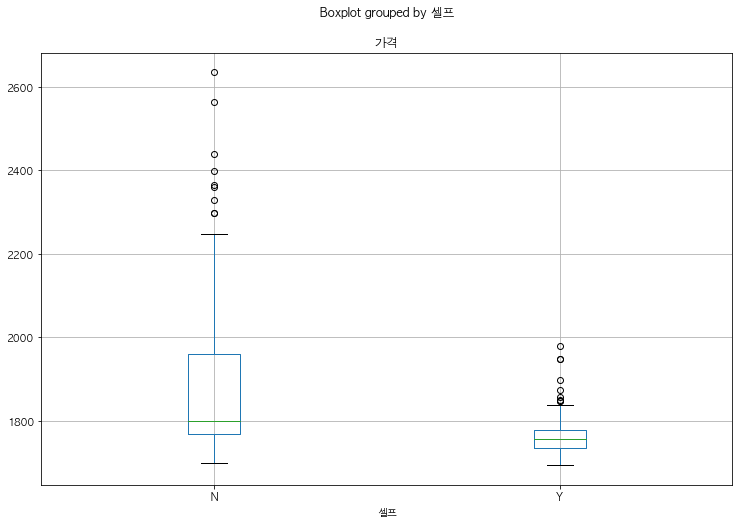

In [66]:
stations.boxplot(column='가격', by='셀프', figsize=(12,8))

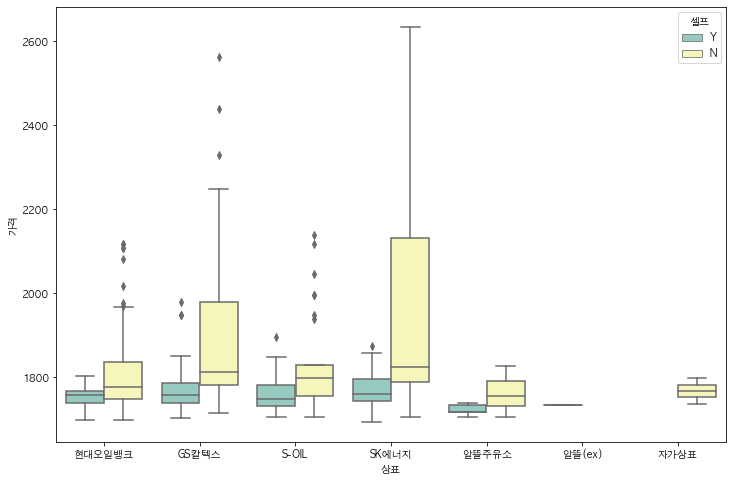

In [69]:
plt.figure(figsize=(12,8))
sns.boxplot(x='상표', y='가격', hue='셀프', data=stations, palette='Set3')
plt.show()

/Users/namgyeongmin/opt/miniconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 9.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


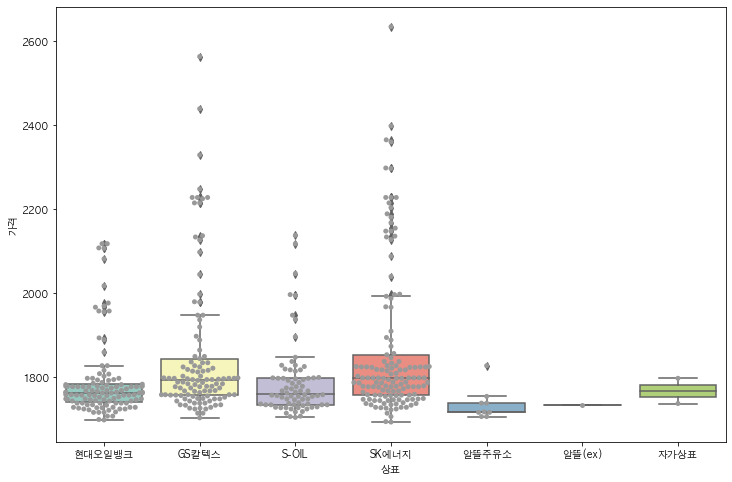

In [70]:
plt.figure(figsize=(12,8))
sns.boxplot(x='상표', y='가격', data=stations, palette='Set3')
sns.swarmplot(x='상표', y='가격', data=stations, color=".6")
plt.show()

In [75]:
import json
import folium
import googlemaps
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [76]:
stations.sort_values(by='가격', ascending=False).head(10)

,Oil_store,주소,가격,셀프,상표,구
157,서남주유소,서울 중구 통일로 30,2634.0,N,SK에너지,중구
236,서계주유소,서울 용산구 청파로 367 (서계동),2563.0,N,GS칼텍스,용산구
156,필동주유소,서울 중구 퇴계로 196 (필동2가),2439.0,N,GS칼텍스,중구
155,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2398.0,N,SK에너지,중구
401,뉴서울(강남),서울 강남구 언주로 716,2365.0,N,SK에너지,강남구
235,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2360.0,N,SK에너지,용산구
154,약수주유소,서울 중구 다산로 173,2329.0,N,GS칼텍스,중구
281,강동주유소,서울 강동구 양재대로 1509 (길동),2298.0,N,SK에너지,강동구
192,선우상사Q엔느,서울 서초구 방배로 66 (방배동),2297.0,N,SK에너지,서초구
433,구로주유소,서울 구로구 구로동로 137 (구로동),2248.0,N,GS칼텍스,구로구


In [78]:
stations.sort_values(by='가격', ascending=True).head(10)

,Oil_store,주소,가격,셀프,상표,구
313,개나리Self주유소,서울 양천구 남부순환로 442 (신월동),1694.0,Y,SK에너지,양천구
347,동서울고속주유소,서울 동대문구 한천로 414,1695.0,Y,SK에너지,동대문구
0,(주)자연에너지 햇살주유소,서울 도봉구 방학로 142 (방학동),1699.0,Y,현대오일뱅크,도봉구
348,(주)자연에너지 국민주유소,서울 동대문구 답십리로 223 (답십리동),1700.0,N,현대오일뱅크,동대문구
237,수유동주유소,서울 강북구 도봉로 395 (수유동),1704.0,Y,GS칼텍스,강북구
210,(주)기지에너지,서울 중랑구 용마산로 716 (신내동),1705.0,N,S-OIL,중랑구
315,현대주유소,서울 양천구 남부순환로 372 (신월동),1707.0,Y,S-OIL,양천구
89,화곡역주유소,서울 강서구 강서로 154 (화곡동),1707.0,Y,알뜰주유소,강서구
90,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),1707.0,N,알뜰주유소,강서구
314,가로공원주유소,서울 양천구 가로공원로 165 (신월동),1707.0,N,SK에너지,양천구


In [79]:
import numpy as np
gu_data = pd.pivot_table(stations, index=['구'], values=['가격'],  aggfunc=np.mean)

gu_data.head()

,가격
구,
강남구,1940.194444
강동구,1857.250000
강북구,1732.769231
강서구,1779.656250
관악구,1790.733333


In [93]:
geo_path = './data/02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
            data = gu_data,
            columns=[gu_data.index, '가격'],
            fill_color='PuRd', #PuRd, YlGnBu
            key_on='feature.id')
map

In [95]:
oil_price_top10 = stations.sort_values(by='가격', ascending=False).head(10)
oil_price_top10

,Oil_store,주소,가격,셀프,상표,구
157,서남주유소,서울 중구 통일로 30,2634.0,N,SK에너지,중구
236,서계주유소,서울 용산구 청파로 367 (서계동),2563.0,N,GS칼텍스,용산구
156,필동주유소,서울 중구 퇴계로 196 (필동2가),2439.0,N,GS칼텍스,중구
155,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2398.0,N,SK에너지,중구
401,뉴서울(강남),서울 강남구 언주로 716,2365.0,N,SK에너지,강남구
235,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2360.0,N,SK에너지,용산구
154,약수주유소,서울 중구 다산로 173,2329.0,N,GS칼텍스,중구
281,강동주유소,서울 강동구 양재대로 1509 (길동),2298.0,N,SK에너지,강동구
192,선우상사Q엔느,서울 서초구 방배로 66 (방배동),2297.0,N,SK에너지,서초구
433,구로주유소,서울 구로구 구로동로 137 (구로동),2248.0,N,GS칼텍스,구로구


In [96]:
oil_price_bottom10 = stations.sort_values(by='가격', ascending=True).head(10)
oil_price_bottom10

,Oil_store,주소,가격,셀프,상표,구
313,개나리Self주유소,서울 양천구 남부순환로 442 (신월동),1694.0,Y,SK에너지,양천구
347,동서울고속주유소,서울 동대문구 한천로 414,1695.0,Y,SK에너지,동대문구
0,(주)자연에너지 햇살주유소,서울 도봉구 방학로 142 (방학동),1699.0,Y,현대오일뱅크,도봉구
348,(주)자연에너지 국민주유소,서울 동대문구 답십리로 223 (답십리동),1700.0,N,현대오일뱅크,동대문구
237,수유동주유소,서울 강북구 도봉로 395 (수유동),1704.0,Y,GS칼텍스,강북구
210,(주)기지에너지,서울 중랑구 용마산로 716 (신내동),1705.0,N,S-OIL,중랑구
315,현대주유소,서울 양천구 남부순환로 372 (신월동),1707.0,Y,S-OIL,양천구
89,화곡역주유소,서울 강서구 강서로 154 (화곡동),1707.0,Y,알뜰주유소,강서구
90,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),1707.0,N,알뜰주유소,강서구
314,가로공원주유소,서울 양천구 가로공원로 165 (신월동),1707.0,N,SK에너지,양천구


In [97]:
gmap_key = '************************'
gmaps = googlemaps.Client(key=gmap_key)

In [98]:
from tqdm import tqdm_notebook

lat = []
lng = []

for n in tqdm_notebook(oil_price_top10.index):
    try:
        tmp_add = str(oil_price_top10['주소'][n]).split('(')[0]
        tmp_map = gmaps.geocode(tmp_add)

        tmp_loc = tmp_map[0].get('geometry')
        lat.append(tmp_loc['location']['lat'])
        lng.append(tmp_loc['location']['lng'])

    except:
        lat.append(np.nan)
        lng.append(np.nan)
        print('Here is nan!')

oil_price_top10['lat'] = lat
oil_price_top10['lng'] = lng
oil_price_top10

/var/folders/sf/6z15ln896cdb_vcd6ndtf9g00000gn/T/ipykernel_42550/3570162572.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for n in tqdm_notebook(oil_price_top10.index):


  0%|          | 0/10 [00:00<?, ?it/s]

,Oil_store,주소,가격,셀프,상표,구,lat,lng
157,서남주유소,서울 중구 통일로 30,2634.0,N,SK에너지,중구,37.558348,126.972090
236,서계주유소,서울 용산구 청파로 367 (서계동),2563.0,N,GS칼텍스,용산구,37.552290,126.968935
156,필동주유소,서울 중구 퇴계로 196 (필동2가),2439.0,N,GS칼텍스,중구,37.560850,126.993653
155,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2398.0,N,SK에너지,중구,37.561648,126.997142
401,뉴서울(강남),서울 강남구 언주로 716,2365.0,N,SK에너지,강남구,37.517636,127.035756
235,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2360.0,N,SK에너지,용산구,37.550179,126.972463
154,약수주유소,서울 중구 다산로 173,2329.0,N,GS칼텍스,중구,37.559009,127.012663
281,강동주유소,서울 강동구 양재대로 1509 (길동),2298.0,N,SK에너지,강동구,37.540610,127.140602
192,선우상사Q엔느,서울 서초구 방배로 66 (방배동),2297.0,N,SK에너지,서초구,37.480653,126.998505
433,구로주유소,서울 구로구 구로동로 137 (구로동),2248.0,N,GS칼텍스,구로구,37.490737,126.883519


In [99]:
from tqdm import notebook

lat = []
lng = []

for n in notebook.tqdm(oil_price_bottom10.index):
    try:
        tmp_add = oil_price_bottom10['주소'][n].split('(')[0]
        tmp_map = gmaps.geocode(tmp_add)

        tmp_loc = tmp_map[0]['geometry']
        lat.append(tmp_loc['location']['lat'])
        lng.append(tmp_loc['location']['lng'])

    except:
        lat.append(np.nan)
        lng.append(np.nan)
        print('Here is nan!')

oil_price_bottom10['lat'] = lat
oil_price_bottom10['lng'] = lng
oil_price_bottom10

  0%|          | 0/10 [00:00<?, ?it/s]

,Oil_store,주소,가격,셀프,상표,구,lat,lng
313,개나리Self주유소,서울 양천구 남부순환로 442 (신월동),1694.0,Y,SK에너지,양천구,37.528087,126.832981
347,동서울고속주유소,서울 동대문구 한천로 414,1695.0,Y,SK에너지,동대문구,37.597511,127.068033
0,(주)자연에너지 햇살주유소,서울 도봉구 방학로 142 (방학동),1699.0,Y,현대오일뱅크,도봉구,37.663011,127.036398
348,(주)자연에너지 국민주유소,서울 동대문구 답십리로 223 (답십리동),1700.0,N,현대오일뱅크,동대문구,37.572933,127.065016
237,수유동주유소,서울 강북구 도봉로 395 (수유동),1704.0,Y,GS칼텍스,강북구,37.642140,127.029568
210,(주)기지에너지,서울 중랑구 용마산로 716 (신내동),1705.0,N,S-OIL,중랑구,37.614704,127.101898
315,현대주유소,서울 양천구 남부순환로 372 (신월동),1707.0,Y,S-OIL,양천구,37.533811,126.829240
89,화곡역주유소,서울 강서구 강서로 154 (화곡동),1707.0,Y,알뜰주유소,강서구,37.540657,126.841506
90,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),1707.0,N,알뜰주유소,강서구,37.531554,126.856024
314,가로공원주유소,서울 양천구 가로공원로 165 (신월동),1707.0,N,SK에너지,양천구,37.536940,126.834278


In [100]:
map = folium.Map(location=[37.5202, 126.975], zoom_start=10.5)

for n in oil_price_top10.index:
    if pd.notnull(oil_price_top10['lat'][n]):
        folium.CircleMarker([oil_price_top10['lat'][n], oil_price_top10['lng'][n]], 
                                radius=15, color='#CD3181', 
                                fill_color='#CD3181',
                                fill=True).add_to(map)
    
for n in oil_price_bottom10.index:
    if pd.notnull(oil_price_bottom10['lat'][n]): 
        folium.CircleMarker([oil_price_bottom10['lat'][n], 
                                oil_price_bottom10['lng'][n]], 
                                radius=15, color='#3186cc', 
                                fill_color='#3186cc',
                                fill=True).add_to(map)
        
map